In [119]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D

In [171]:
train, test = datasets.cifar10.load_data()

In [172]:
train[0].shape, train[1].shape, test[0].shape, test[1].shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [173]:
def get_cat_and_dog_image(data):
  X = []
  y = []

  for i in range(len(data[1])):
    if(data[1][i]==3):
      X.append(data[0][i])
      y.append([0])
    if(data[1][i]==5):
      X.append(data[0][i])
      y.append([1])

  return np.array(X), np.array(y)

In [174]:
X_train , y_train = get_cat_and_dog_image(train)

X_test, y_test = get_cat_and_dog_image(test)

In [175]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [176]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9000, 32, 32, 3),
 (9000, 1),
 (1000, 32, 32, 3),
 (1000, 1),
 (2000, 32, 32, 3),
 (2000, 1))

In [177]:
len(X_train), len(y_train), len(X_test), len(y_test)

(9000, 9000, 2000, 2000)

In [178]:
len([y for y in y_train if y==5]), len([y for y in y_train if y==3])

(0, 0)

In [180]:
X_train[5], y_train[5]

(array([[[ 5, 12,  1],
         [ 7, 15,  1],
         [10, 18,  1],
         ...,
         [ 6,  0,  1],
         [ 5,  1,  1],
         [ 5,  0,  0]],
 
        [[ 3,  5,  0],
         [ 8, 14,  1],
         [ 9, 19,  0],
         ...,
         [ 7,  1,  4],
         [ 6,  1,  3],
         [ 5,  1,  0]],
 
        [[ 6,  5,  0],
         [13, 16,  2],
         [19, 26,  4],
         ...,
         [ 8,  4,  2],
         [ 6,  4,  1],
         [ 7,  5,  1]],
 
        ...,
 
        [[20, 79,  9],
         [18, 77,  5],
         [21, 79,  7],
         ...,
         [35, 79,  9],
         [28, 67,  7],
         [30, 64, 12]],
 
        [[23, 86, 16],
         [14, 78,  7],
         [ 6, 64,  2],
         ...,
         [21, 69,  3],
         [22, 66,  6],
         [24, 63, 10]],
 
        [[18, 83, 12],
         [17, 84,  8],
         [20, 75, 10],
         ...,
         [20, 73,  7],
         [19, 70,  7],
         [18, 66,  9]]], dtype=uint8),
 array([1]))

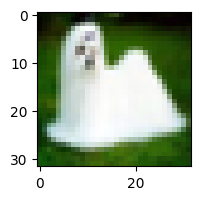

In [181]:
def plot_img_batch(X,y):
    fig, ax = plt.subplots(figsize=(12,12), ncols=4)
    for i, img in enumerate(X[:4]):
        ax[i].imshow(img)
        ax[i].title.set_text(y[i])
    plt.show()

In [182]:
class_labels = {0:'cat', 1:'dogs'}

## Scaling

In [183]:
X_train = X_train / 255
X_val = X_val /255
X_test = X_test / 255

In [184]:
X_train.min(), X_train.max()

(np.float64(0.0), np.float64(1.0))

In [186]:
X_train.shape, y_train

((9000, 32, 32, 3),
 array([[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]]))

In [187]:
y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)

## Model

In [223]:
cnn = tf.keras.models.Sequential([
    #cnn layers
    Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'),
    MaxPool2D((2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),

    Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),

    Flatten(),
    #dense layer
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [224]:
cnn.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [225]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,105 (113.69 KB)

 Trainable params: 29,105 (113.69 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
history = cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.5210 - loss: 0.6884 - val_accuracy: 0.6560 - val_loss: 0.6381
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6369 - loss: 0.6397 - val_accuracy: 0.6710 - val_loss: 0.6070
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.6637 - loss: 0.6090 - val_accuracy: 0.6970 - val_loss: 0.5925
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.6820 - loss: 0.5893 - val_accuracy: 0.6910 - val_loss: 0.5764
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.7070 - loss: 0.5687 - val_accuracy: 0.7110 - val_loss: 0.5531
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7254 - loss: 0.5417 - val_accuracy: 0.7090 - val_loss: 0.5628
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.7353 - loss: 0.5250 - val_accuracy: 0.7410 - val_loss: 0.5297
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.7505 - loss: 0.5129 - 

## Model Evaluatation

In [227]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [228]:
def plot_performance(train_perf, val_perf, title=''):
    plt.figure(figsize=(5,5))
    plt.plot(train_perf, label=f'Train {title}')
    plt.plot(val_perf, label=f'Val {title}')
    plt.title(title)
    plt.legend()
    plt.show()

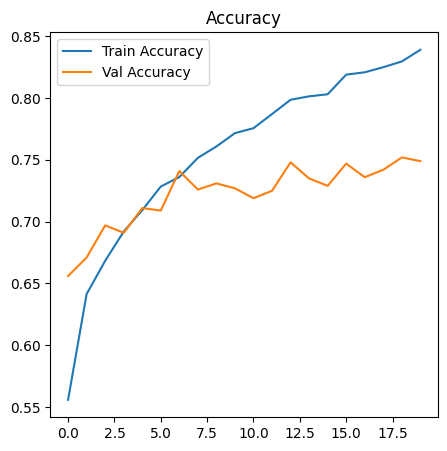

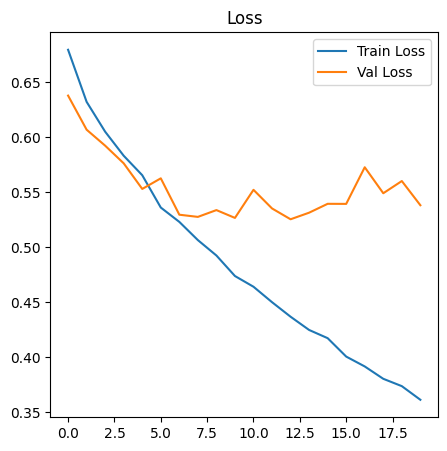

In [229]:
plot_performance(train_acc, val_acc, 'Accuracy')
plot_performance(train_loss, val_loss, 'Loss')

In [230]:
y_pred = cnn.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [231]:
y_pred_class = [0 if y < 0.5 else 1 for y in y_pred ]

In [232]:
y_test = y_test.reshape(-1,)

In [233]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.75      0.75      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



## Testing with unseen data

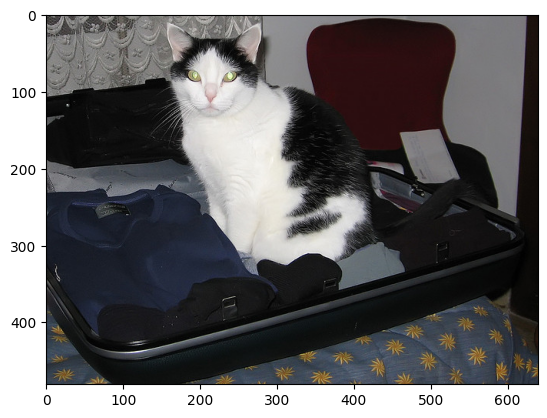

In [234]:
new_img = cv2.imread('./000000005142.jpg')
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

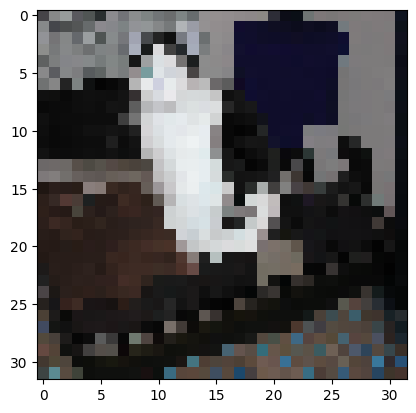

In [235]:
new_img = tf.image.resize(new_img, (32,32))
plt.imshow(new_img.numpy().astype(int))
plt.show()

In [236]:
new_img = np.expand_dims(new_img/255, 0)
y_new_pred = cnn.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [237]:
y_new_pred

array([[0.01126638]], dtype=float32)

## Save the model

In [238]:
import os

cnn.save(os.path.join('./', 'model.h5'))